### 3. Precinct 
#### Discover Precincts with The Highest True Flag Rates

Import libraries and load data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker
from adjustText import adjust_text

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\11_Vehicle_stop_NYPD\NYPD_Vehicle_Stop_Reports.csv')

sns.set_style('ticks')
# change data type 
df['date']=pd.to_datetime(df['OCCUR_DT'])
df['hour']=pd.to_datetime(df['OCCUR_TM'], format='%H:%M:%S').dt.hour

- **Which precinct stopped vehicles the most frequently:**

	Counted the total number of stops in each precinct and visualized the distribution with a box plot. 

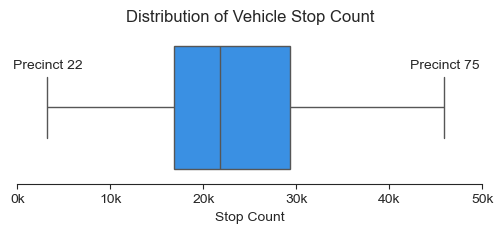

In [2]:
plt.figure(figsize=(6,2))

df_precinct =df['CMD_CD'].value_counts().to_frame().sort_index()
sns.boxplot(data=df_precinct['count'], orient="h",color='dodgerblue')
plt.annotate(text=f'Precinct {df_precinct.idxmin().iloc[0]}', xy=(df_precinct['count'].min(),-0.25), ha='center')
plt.annotate(text=f'Precinct {df_precinct.idxmax().iloc[0]}', xy=(df_precinct['count'].max(),-0.25), ha='center')
sns.despine(left=True)
plt.xlim(0,50000)
plt.title('Distribution of Vehicle Stop Count')
plt.xlabel('Stop Count')
plt.gca().tick_params(left=False)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))

**Insight**

Precinct 75 has the highest stop count, with nearly 50,000 vehicle stops.
Precinct 22 is the lowest stop count, with about 3,000 stops.

**True Rates per each Flag**

Counted number of stops per precinct and calculated True flag rates, displayed using a box chart.

**Force Used Distribution**

In [3]:
t_f =[True,False]

In [4]:
df_pre_force = df.pivot_table(index='CMD_CD',columns='FORCE_USED_FLG', aggfunc='count',values='EVNT_KEY')
df_pre_force = df_pre_force.reindex(t_f,axis=1)
df_pre_force = df_pre_force.div(df_pre_force.sum(axis=1)/100, axis=0)
df_pre_force.sort_values(by=True,ascending=False,inplace=True)

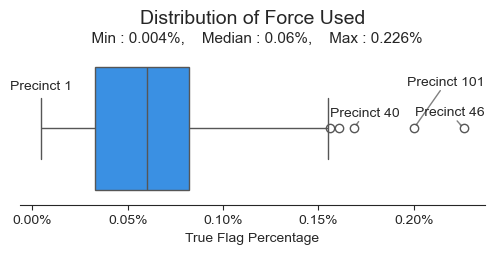

In [5]:
plt.figure(figsize=(6,2))

sns.boxplot(data=df_pre_force[True], orient="h",color='dodgerblue')

plt.annotate(text=f'Precinct {df_pre_force[True].idxmin()}', xy=(df_pre_force[True].min(),-0.25), ha='center')
text=[]
for i in range(3):
    text.append(plt.annotate(text=f'Precinct {df_pre_force.index[i]}', xy=(df_pre_force[True].iloc[i],0)))
sns.despine(left=True)
adjust_text(text,expand=(1.1,2.5),arrowprops=dict(arrowstyle='->', color='grey'))

plt.title('Distribution of Force Used',pad=20,fontsize=14)
plt.suptitle(
    f'      Min : {round(df_pre_force[True].min(),3)}%,    Median : {round(df_pre_force[True].median(),3)}%,    Max : {round(df_pre_force[True].max(),3)}%',
    fontsize=11)

plt.xlabel('True Flag Percentage')
plt.gca().tick_params(left=False)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=2))

**Insight**

Although the overall Force Used percentage is low as under 1%,
Precinct 46 has the highest rate at over 0.2%, followed by Precinct 101

**Arrest per Precinct**

In [6]:
df_pre_arrest = df.pivot_table(index='CMD_CD',columns='ARREST_MADE_FLG', aggfunc='count',values='EVNT_KEY').astype(float)
df_pre_arrest = df_pre_arrest.reindex(t_f,axis=1)
df_pre_arrest = df_pre_arrest.div(df_pre_arrest.sum(axis=1)/100, axis=0)
df_pre_arrest.sort_values(by=True,ascending=False, inplace=True)

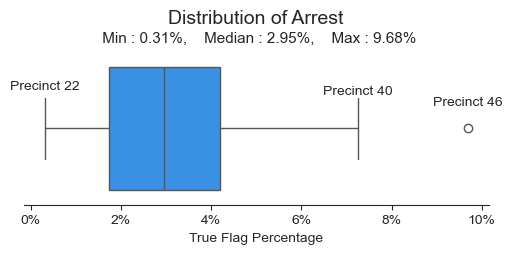

In [10]:
plt.figure(figsize=(6,2))

sns.boxplot(data=df_pre_arrest[True], orient="h",color='dodgerblue')

plt.annotate(text=f'Precinct {df_pre_arrest[True].idxmin()}', xy=(df_pre_arrest[True].min(),-0.25), ha='center')
for i in range(2):
    plt.annotate(text=f'Precinct {df_pre_arrest.index[i]}', xy=(df_pre_arrest[True].iloc[i],-0.07*i-0.15), ha='center')
sns.despine(left=True)

plt.title('Distribution of Arrest',pad=20,fontsize=14)
plt.suptitle(f'     Min : {round(df_pre_arrest[True].min(),2)}%,    Median : {round(df_pre_arrest[True].median(),2)}%,    Max : {round(df_pre_arrest[True].max(),2)}%',
             fontsize=11)
plt.xlabel('True Flag Percentage')
plt.gca().tick_params(left=False)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

**Insight**

Precinct 46 has the highest Arrest flag rate at nearly 10%, followed by Precinct 40.
Precinct 22 has the lowest Arrest flag rate at almost 0%.

Considering Precinct 46 has the highest Force Used and Arrest rates, this precinct maybe handle heavier crime, or more intense policing.

**Summons Issued per Precinct**

In [8]:
df_pre_summon = df.pivot_table(index='CMD_CD',columns='SUMMON_ISSUED_FLG', aggfunc='count',values='EVNT_KEY').astype(float)
df_pre_summon = df_pre_summon.reindex(t_f,axis=1)
df_pre_summon = df_pre_summon.div(df_pre_summon.sum(axis=1)/100, axis=0)
df_pre_summon.sort_values(by=True,ascending=False,inplace=True)

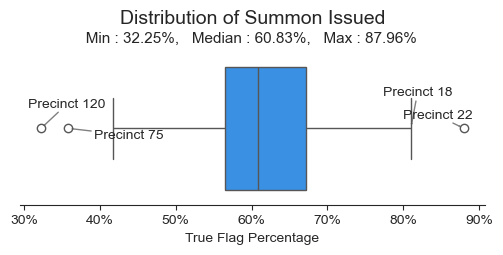

In [11]:
plt.figure(figsize=(6,2))

sns.boxplot(data=df_pre_summon[True], orient="h",color='dodgerblue')

text=[]
for i in range(-2,2):
    text.append(plt.annotate(text=f'Precinct {df_pre_summon.index[i]}', xy=(df_pre_summon[True].iloc[i],0)))
   
sns.despine(left=True)
adjust_text(text,expand=(1.2,2),arrowprops=dict(arrowstyle='->', color='grey'))

plt.title('Distribution of Summon Issued',pad=20,fontsize=14)
plt.suptitle(f'   Min : {round(df_pre_summon[True].min(),2)}%,   Median : {round(df_pre_summon[True].median(),2)}%,   Max : {round(df_pre_summon[True].max(),2)}%',
             fontsize=11)

plt.xlabel('True Flag Percentage')
plt.gca().tick_params(left=False)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

**Insight**

Summon issued rates are higher than other flags.

Precinct 22 has the highest rate at almost 90%, while Precinct 120 has the lowest rate at about 30%. 

Based on the result of Arrest rate, this suggests Precinct 22 typically handles lighter issues.